In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from api_tester import read_file
import seaborn as sns
%matplotlib inline

First we retrieve the data gathered from the Idealista API stored in a JSON file

In [2]:
filename = 'api_out.json'

arr = read_file(filename)['elementList']
nd = pd.DataFrame(arr)
nd.size
#nd.head(5)

1900

In [3]:
nd.head()

,propertyCode,thumbnail,numPhotos,floor,price,propertyType,operation,size,rooms,bathrooms,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,topNewDevelopment,topPlus,externalReference,labels,highlight
0,33098785,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,45,bj,230000.0,flat,sale,109.0,3,2,...,"{'subtitle': 'Amora, Seixal', 'title': 'Aparta...",True,False,False,False,False,False,NaN,NaN,NaN
1,33098749,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,48,NaN,370000.0,chalet,sale,120.0,3,2,...,"{'subtitle': 'Rio de Mouro, Sintra', 'title': ...",True,False,False,False,False,False,NaN,NaN,NaN
2,33100434,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,116,NaN,635000.0,chalet,sale,386.0,6,5,...,"{'subtitle': 'Sintra', 'title': 'Moradia gemin...",True,False,False,False,False,False,NaN,NaN,NaN
3,33101778,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,27,NaN,199000.0,chalet,sale,46.0,2,1,...,"{'subtitle': 'Milharado, Mafra', 'title': 'Mor...",True,False,False,False,False,False,1701c29,NaN,NaN
4,33101785,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,51,NaN,4000000.0,chalet,sale,439.0,5,5,...,"{'subtitle': 'Carcavelos e Parede, Cascais', '...",True,False,False,False,False,False,514B/2023AL,"[{'name': 'seaViewsType', 'text': 'Vista mar'}...",NaN


Now let's visualize the data we've just fetched to get a better idea of the geographical disposal of the real estate for this study

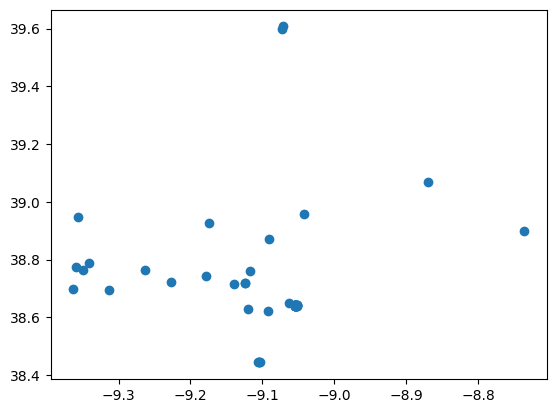

In [4]:
plt.scatter(nd.longitude, nd.latitude)

Text(0.5, 1.0, 'Distribution of houses - Lisbon Metro Area')

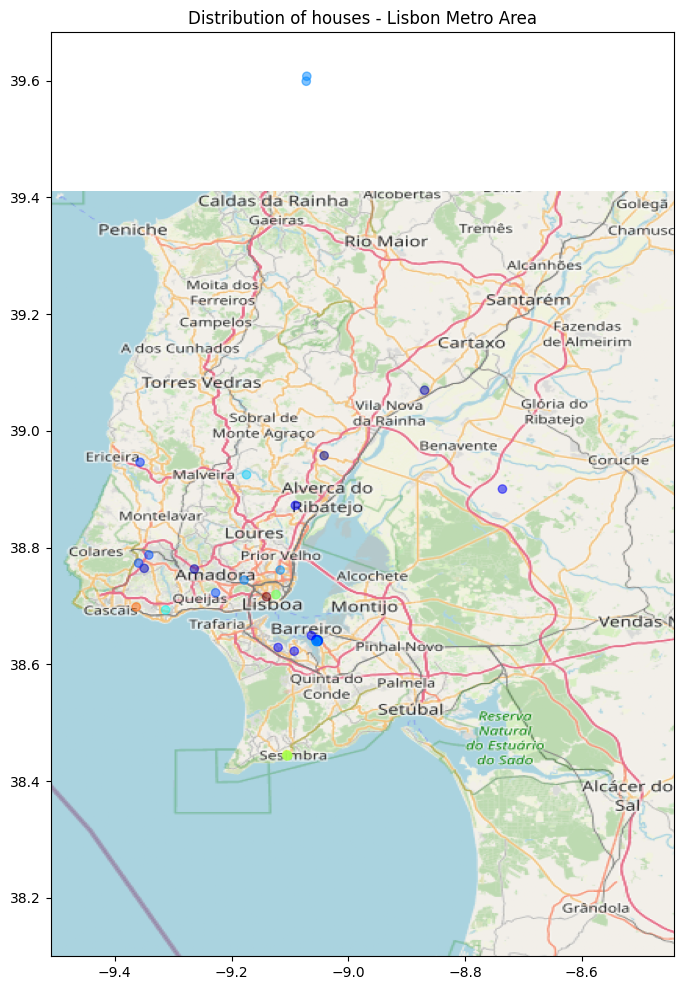

In [5]:
plt.figure(figsize=(12,12))
img = plt.imread('lisbon.png')
plt.imshow(img, zorder=0, extent=[-9.51, -8.442, 38.10, 39.41, ])

plt.scatter(x=nd.longitude, y=nd.latitude, alpha=0.5,
             c=nd['priceByArea'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')

plt.title('Distribution of houses - Lisbon Metro Area')

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

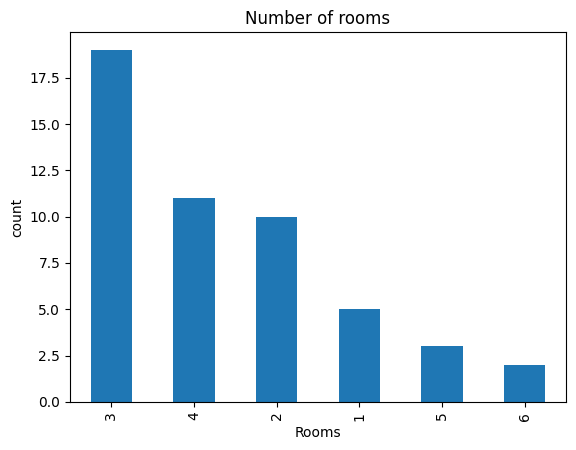

In [6]:
nd['rooms'].value_counts().plot(kind='bar')
plt.title('Number of rooms')
plt.xlabel('Rooms')
plt.ylabel('count')
sns.despine

In [7]:
nd = pd.get_dummies(data=nd, columns=['status','country','propertyType'])

<Figure size 1000x1000 with 0 Axes>

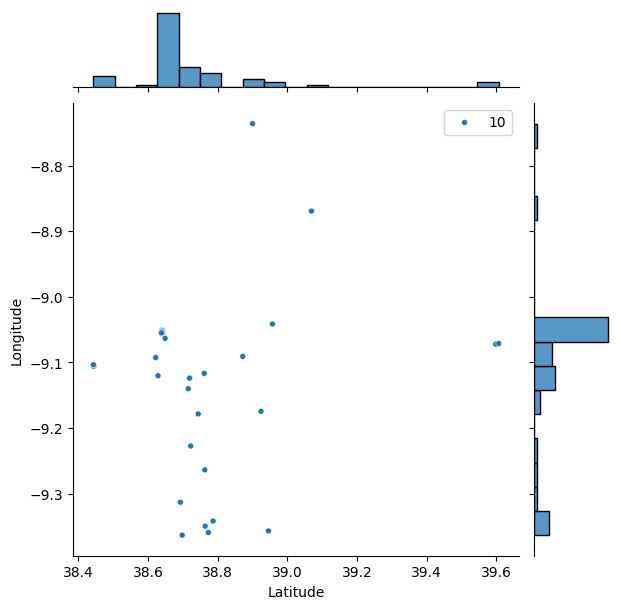

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [8]:
plt.figure(figsize=(10,10))
sns.jointplot(x=nd.latitude.values, y=nd.longitude.values, size=10)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Longitude', fontsize=10)
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs Size')

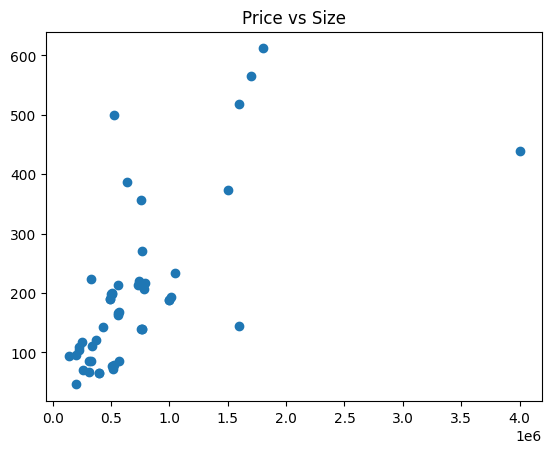

In [9]:
plt.scatter(nd.price,nd['size'])
plt.title('Price vs Size')

Text(0.5, 1.0, 'Price v Longitude')

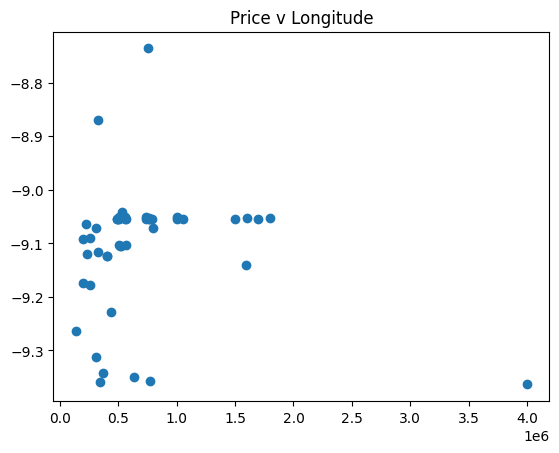

In [10]:
plt.scatter(nd['price'], nd.longitude)
plt.title('Price v Longitude')

Text(0.5, 1.0, 'Price v Latitude')

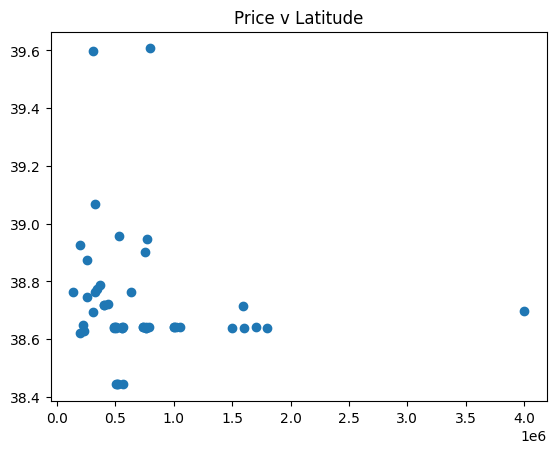

In [11]:
plt.scatter(nd.price, nd.latitude)
plt.title('Price v Latitude')

<AxesSubplot: >

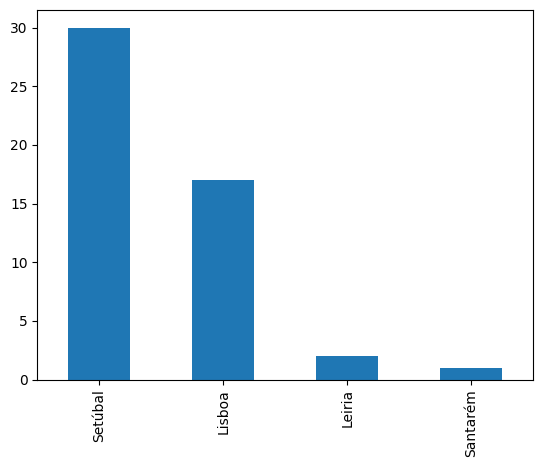

In [12]:
nd.province.value_counts().plot(kind='bar')


Text(0.5, 1.0, 'Price v Province')

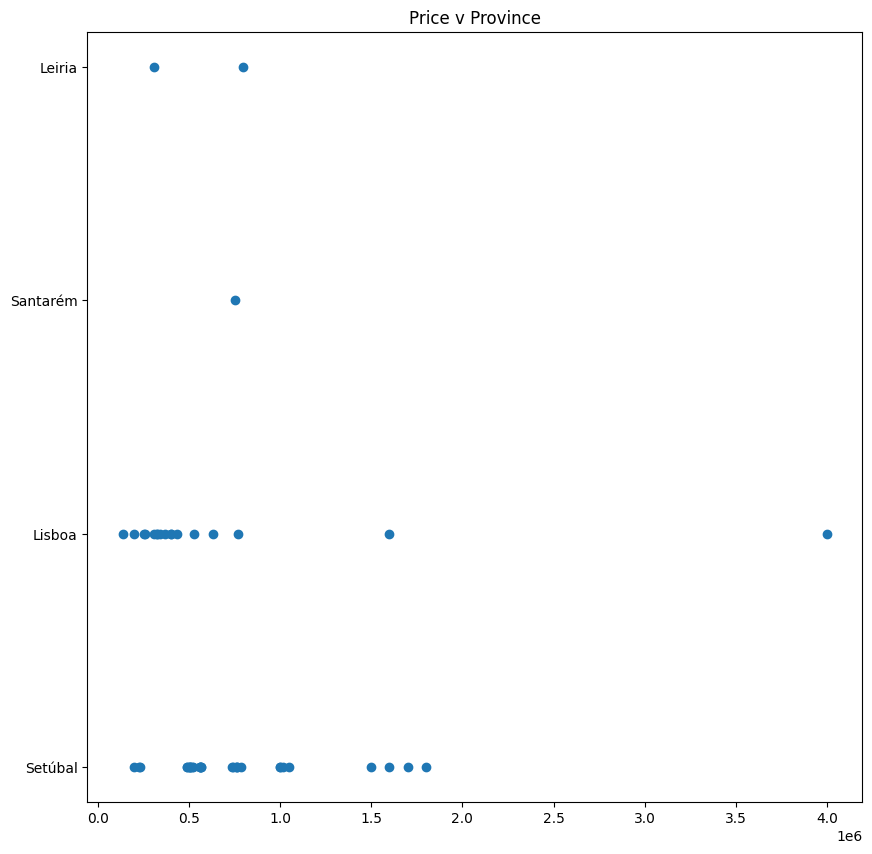

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(nd.price, nd.province)
plt.title('Price v Province')

Text(0.5, 1.0, 'Price v Municipality')

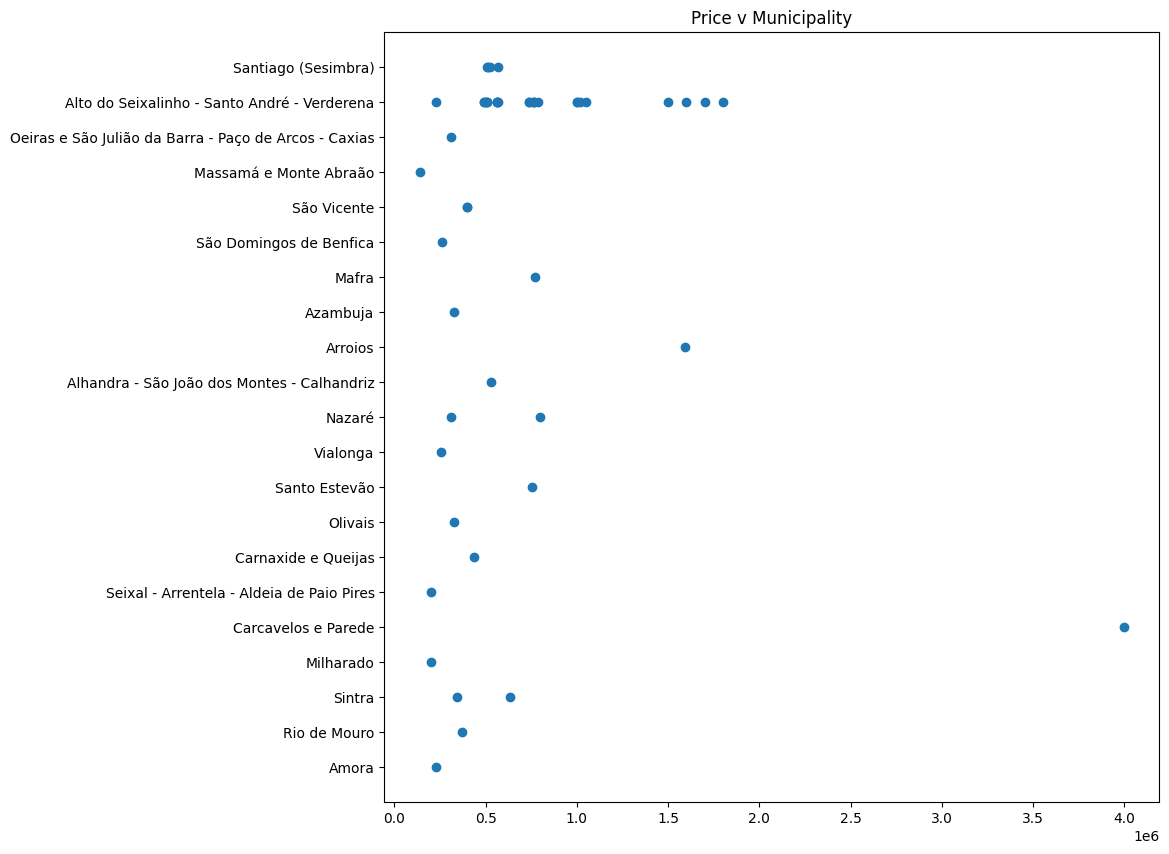

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(nd.price, nd.municipality)
plt.title('Price v Municipality')

Text(0.5, 1.0, 'Price v Bathrooms')

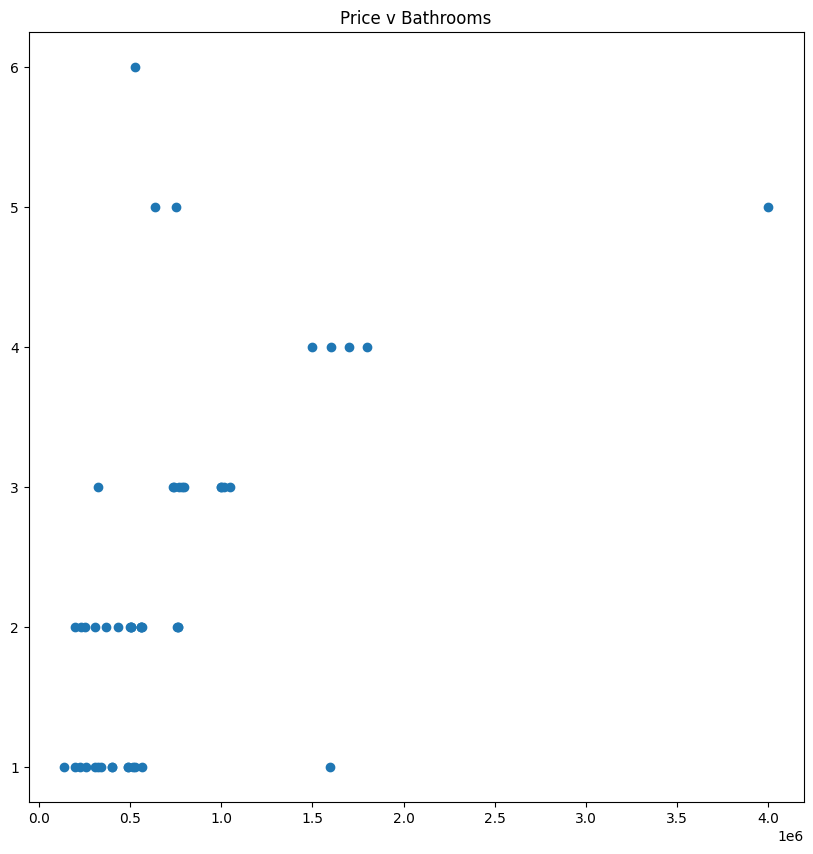

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(nd.price, nd.bathrooms)
plt.title('Price v Bathrooms')

In [16]:
nd = nd.replace({True:1,False:0})
nd.head()

,propertyCode,thumbnail,numPhotos,floor,price,operation,size,rooms,bathrooms,address,...,hasStaging,topNewDevelopment,topPlus,externalReference,labels,highlight,status_good,country_pt,propertyType_chalet,propertyType_flat
0,33098785,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,45,bj,230000.0,sale,109.0,3,2,Praceta Polido Valente,...,0,0,0,NaN,NaN,NaN,1,1,0,1
1,33098749,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,48,NaN,370000.0,sale,120.0,3,2,"Rua da Eirinha, 41",...,0,0,0,NaN,NaN,NaN,1,1,1,0
2,33100434,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,116,NaN,635000.0,sale,386.0,6,5,"Rua da Aroeira, 11",...,0,0,0,NaN,NaN,NaN,1,1,1,0
3,33101778,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,27,NaN,199000.0,sale,46.0,2,1,Milharado,...,0,0,0,1701c29,NaN,NaN,1,1,1,0
4,33101785,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,51,NaN,4000000.0,sale,439.0,5,5,Jardins da Parede,...,0,0,0,514B/2023AL,"[{'name': 'seaViewsType', 'text': 'Vista mar'}...",NaN,1,1,1,0


In [20]:
nd.columns

Index(['propertyCode', 'thumbnail', 'numPhotos', 'floor', 'price', 'operation',
       'size', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'latitude', 'longitude', 'showAddress', 'url', 'distance',
       'description', 'hasVideo', 'newDevelopment', 'hasLift', 'parkingSpace',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'topNewDevelopment', 'topPlus',
       'externalReference', 'labels', 'highlight', 'status_good', 'country_pt',
       'propertyType_chalet', 'propertyType_flat'],
      dtype='object')

In [23]:
x = nd.drop(columns=['municipality','district','highlight','labels','hasPlan','priceByArea','operation','parkingSpace','propertyCode','suggestedTexts','detailedType','description','url','showAddress','hasVideo','latitude','longitude','externalReference', 'numPhotos','thumbnail', 'address', 'has3DTour', 'has360', 'hasStaging', 'topNewDevelopment', 'topPlus'])
x.head()

,floor,price,size,rooms,bathrooms,province,distance,newDevelopment,hasLift,status_good,country_pt,propertyType_chalet,propertyType_flat
0,bj,230000.0,109.0,3,2,Setúbal,10479,0,1.0,1,1,0,1
1,NaN,370000.0,120.0,3,2,Lisboa,18979,0,NaN,1,1,1,0
2,NaN,635000.0,386.0,6,5,Lisboa,18818,0,NaN,1,1,1,0
3,NaN,199000.0,46.0,2,1,Lisboa,22756,0,NaN,1,1,1,0
4,NaN,4000000.0,439.0,5,5,Lisboa,19589,0,NaN,1,1,1,0


In [24]:
floor_values_to_replace = x.query("floor >= 'A' ")['floor']
selected_rows = x['floor'].isin(floor_values_to_replace)
x.loc[selected_rows, 'floor'] = 0

x.head()

,floor,price,size,rooms,bathrooms,province,distance,newDevelopment,hasLift,status_good,country_pt,propertyType_chalet,propertyType_flat
0,0,230000.0,109.0,3,2,Setúbal,10479,0,1.0,1,1,0,1
1,NaN,370000.0,120.0,3,2,Lisboa,18979,0,NaN,1,1,1,0
2,NaN,635000.0,386.0,6,5,Lisboa,18818,0,NaN,1,1,1,0
3,NaN,199000.0,46.0,2,1,Lisboa,22756,0,NaN,1,1,1,0
4,NaN,4000000.0,439.0,5,5,Lisboa,19589,0,NaN,1,1,1,0


In [25]:
x.fillna(0, inplace=True)
x.head()

,floor,price,size,rooms,bathrooms,province,distance,newDevelopment,hasLift,status_good,country_pt,propertyType_chalet,propertyType_flat
0,0,230000.0,109.0,3,2,Setúbal,10479,0,1.0,1,1,0,1
1,0,370000.0,120.0,3,2,Lisboa,18979,0,0.0,1,1,1,0
2,0,635000.0,386.0,6,5,Lisboa,18818,0,0.0,1,1,1,0
3,0,199000.0,46.0,2,1,Lisboa,22756,0,0.0,1,1,1,0
4,0,4000000.0,439.0,5,5,Lisboa,19589,0,0.0,1,1,1,0


Let's create two separate sets, one specific for Lisbon, and the other with all the other provinces we can find

In [26]:
x_lisbon = x.loc[x['province'] == 'Lisboa']
x_lisbon = x_lisbon.drop(columns=['province'])

x = pd.get_dummies(data=x, columns=['province'])

Now let's separate the labels we which to predict in both datasets, the price

In [27]:
y = x['price']
x = x.drop(columns=['price'])

y_lisbon = x_lisbon['price']
x_lisbon = x_lisbon.drop(columns=['price'])


In [28]:
print('x shape:',x.shape,' y shape:',y.shape)
print('x lisbon shape:',x_lisbon.shape,' y lisbon shape:',y_lisbon.shape)

x shape: (50, 15)  y shape: (50,)
x lisbon shape: (17, 11)  y lisbon shape: (17,)


In [29]:
nd.describe()

,numPhotos,price,size,rooms,bathrooms,latitude,longitude,showAddress,hasVideo,newDevelopment,...,hasPlan,has3DTour,has360,hasStaging,topNewDevelopment,topPlus,status_good,country_pt,propertyType_chalet,propertyType_flat
count,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,...,50.000000,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.000000,50.000000
mean,32.300000,7.172460e+05,196.783000,3.060000,2.320000,38.723147,-9.104801,0.280000,0.120000,0.0,...,0.680000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.260000,0.740000
std,16.779786,6.217382e+05,136.391354,1.202209,1.268777,0.220082,0.116701,0.453557,0.328261,0.0,...,0.471212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443087,0.443087
min,1.000000,1.375000e+05,46.000000,1.000000,1.000000,38.443204,-9.363236,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000
25%,24.000000,3.774750e+05,97.750000,2.000000,1.000000,38.639912,-9.123019,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.250000
50%,38.000000,5.450000e+05,166.500000,3.000000,2.000000,38.642218,-9.055049,0.000000,0.000000,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,1.000000
75%,38.000000,7.680000e+05,216.250000,4.000000,3.000000,38.757293,-9.053892,1.000000,0.000000,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.750000,1.000000
max,116.000000,4.000000e+06,612.000000,6.000000,6.000000,39.607402,-8.736023,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.000000


Set training data for both datasets

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=2)
x_l_train, x_l_test, y_l_train, y_l_test = train_test_split(x_lisbon, y_lisbon, test_size=0.10, random_state=2)

In [31]:
linear = LinearRegression()
linear.fit(x_train, y_train)
predictions = linear.predict(x_test)

In [32]:
linear.score(x_test, y_test)

-0.9219003657223528

In [33]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_split=2,
                                         learning_rate=0.1, loss='squared_error')

In [34]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5)

In [35]:
clf.score(x_test, y_test)

-0.30853316109384155